# **Detekcija lica**

## **Sadržaj**


1.   Uvod
2.   Detekcija lica
3.   Histogram orijentisanih gradijenata
4.   Detekcija lica
5.   OpenCV
6.   HaarCascade
7.   MediaPipe
8.   MTCNN-a
9.   Zaključak
10.  Literatura



## **Uvod**

Cilj projekta predstavlja rešenje problema detekcije lica, kroz primenu tehnika mašinskog učenja i dubokog učenja. Tokom rada će biti objašnjeni i primenjeni određeni algoritmi za obradu fotografija, detekcija lica primenom HOG karakteristika, prepozavanje lica i na samom kraju detekcija lica pomoću HaarCascade, MediaPipe i MTCNN biblioteka.  

Za potrebe ovog rada korišćen je *dataset* koji se sastoji iz fotografija različitih glumaca filma *Avengers*. Glumci čije se fotografije lica nalaze u okviru *dataset-a* nad kojom će biti izvršena detekcija su:
*   Scarlett Johansson
*   Chris Evans
*   Chris Hemsworth
*   Mark Ruffalo
*   Robert Downey Jr.

Link do *dataset*-a je: https://drive.google.com/file/d/1poBLVBGNteXhgMVDO2vo9XxpXDsTeUK6/view




## **Detekcija lica**

Detekcija lica je zadatak računarske vizije u kojem računarski program može otkriti prisustvo ljudskih lica i pronaći njihovu lokaciju na slici ili u video snimku. Ovo je prvi i najvažniji korak za većinu aplikacija računarske vizije koje uključuju lica. Putem nje dobijamo odgovor na pitanje "Da li se lice nalazi na slici i ukoliko se nalazi unutar kog dela slike konkretno?".

Detekcija lica se koristi u velikom broju domena, uključujući sigurnost, marketing, zdravstvo, zabavu, pravosuđe, nadzor, fotografiju i drugo. U slučaju sigurnosti detekcija lica se koristi za pristup kontroli i identifikaciju ljudi na mestima kao što su aerodromi, bankarski sefovi ili druge osjetljive lokacije. Detekcija lica omogućava aplikacije kao što su filteri za lica na društvenim mrežama, a takođe može pomoći u identifikaciji osumnjičenih putem video nadzora ili prepoznavanja lica na sudu.

Detekcija lica na slici je izazovna zbog mnogobrojnih varijabilnosti koje se mogu pojaviti na ljudskim licima, kao što su pozicija, izrazi, orijentacija, boja kože, prisustvo naočara, varijacije u osvetljenju, i različite rezolucije slike.

Bitno je napomenuti da su detektica i prepoznavanje lica potpuno različiti zadaci:
*   Detekcija lica ( *Face detection* ) kao što je prethodno navedeno identifikuje prisustva lica na slici ili u video snimku
*   Prepoznavanje lica ( *Face recognition* ) ide korak dalje od detekcije i identifikuje i razlikuje konkretna lica među detektovanim. Cilj prepoznavanja lica je odgovoriti na pitanje "Ko je osoba čije lice je detektovano?"

Algoritmi za detekciju lica se mogu podeliti u četiri kategorije,
predložene od strane Janga, Krigmana i Ahudže
* algoritmi zasnovani na znanju,
* algoritmi zasnovani na nepromenljivim karakteristikama lica,
* algoritmi koji koriste poklapanje šablona i
* algoritmi zasnovani na izgledu.



Učitavanje *dataset*-a potrebnog za izradu zadatka.

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1poBLVBGNteXhgMVDO2vo9XxpXDsTeUK6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1poBLVBGNteXhgMVDO2vo9XxpXDsTeUK6" -O images.zip && rm -rf /tmp/cookies.txt

--2023-09-11 13:36:37--  https://docs.google.com/uc?export=download&confirm=t&id=1poBLVBGNteXhgMVDO2vo9XxpXDsTeUK6
Resolving docs.google.com (docs.google.com)... 142.251.172.102, 142.251.172.100, 142.251.172.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.172.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/88c250ccr806lfl4q7mpnr6k3tfu3dl4/1694439375000/12172178362461080244/*/1poBLVBGNteXhgMVDO2vo9XxpXDsTeUK6?e=download&uuid=19297163-ddfc-451a-953c-b21a94327d1e [following]
--2023-09-11 13:36:38--  https://doc-10-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/88c250ccr806lfl4q7mpnr6k3tfu3dl4/1694439375000/12172178362461080244/*/1poBLVBGNteXhgMVDO2vo9XxpXDsTeUK6?e=download&uuid=19297163-ddfc-451a-953c-b21a94327d1e
Resolving doc-10-9s-docs.googleusercontent.com (doc-10-9s-docs.googleusercontent.com)... 173.194.196.

Unzip *dataset*-a

In [2]:
!unzip images.zip

Archive:  images.zip
  inflating: cropped_images/chris_evans/chris_evans1.png  
  inflating: cropped_images/chris_evans/chris_evans10.png  
  inflating: cropped_images/chris_evans/chris_evans11.png  
  inflating: cropped_images/chris_evans/chris_evans12.png  
  inflating: cropped_images/chris_evans/chris_evans13.png  
  inflating: cropped_images/chris_evans/chris_evans14.png  
  inflating: cropped_images/chris_evans/chris_evans15.png  
  inflating: cropped_images/chris_evans/chris_evans16.png  
  inflating: cropped_images/chris_evans/chris_evans17.png  
  inflating: cropped_images/chris_evans/chris_evans18.png  
  inflating: cropped_images/chris_evans/chris_evans19.png  
  inflating: cropped_images/chris_evans/chris_evans2.png  
  inflating: cropped_images/chris_evans/chris_evans20.png  
  inflating: cropped_images/chris_evans/chris_evans21.png  
  inflating: cropped_images/chris_evans/chris_evans22.png  
  inflating: cropped_images/chris_evans/chris_evans23.png  
  inflating: cropped_

## **Histogram orijentisanih gradijenata**

HOG ( Histogram orijentisanih gradijenata ) se koristi za ekstrakciju karakteristika iz slika kako bi se detektovali objekti ili regioni od interesa. Nekoliko ključnih aspekata HOG-a u detekciji lica su:
* Ekstrakcija karakteristika iz slika koje su relevantne za detekciju lica. Ove karakteristike se dobijaju analizom gradijenata u slici, tj. kako se intenzitet piksela menja u različitim smerovima.
* HOG razbija sliku na mrežu ćelija i za svaku ćeliju računa histogram orijentacija gradijenata. Orijentacija gradijenta u ovom kontekstu odražava promenu piksela u određenom pravcu. Histogrami orijentacija čine osnovu za opisivanje teksture i oblika u slici. Da bi se povećala robusnost HOG-a na promene u osvetljenju i kontrastu, ćelije se grupišu u blokove, a histogrami se normalizuju. Ovo pomaže da se kompenzuju promene u osvetljenju koje mogu zbuniti detektor.
* HOG detekcija zasnovana je na tzv. kliznom prozoru (engl. sliding window). Kliznim prozorom prelazi se
preko slike te se za svaki položaj kliznog prozora u slici pita klasifikator je li na tom položaju i za tu dimenziju
kliznog prozora na slici osoba. Nakon što se obiđe čitava slika, veličina kliznog prozora se povećava i
postupak se ponavlja.

Ova tehnika se često koristi u kombinaciji s drugim metodama kao što su HaarCascade ili duboke neuronske mreže za bolje rezultate u detekciji lica u različitim uslovima osvetljenja, položaja i izraza lica. U nastavku se nalazi primer kako se može koristiti HOG detektor lica za detekciju i vizualizaciju lica na slici.

1


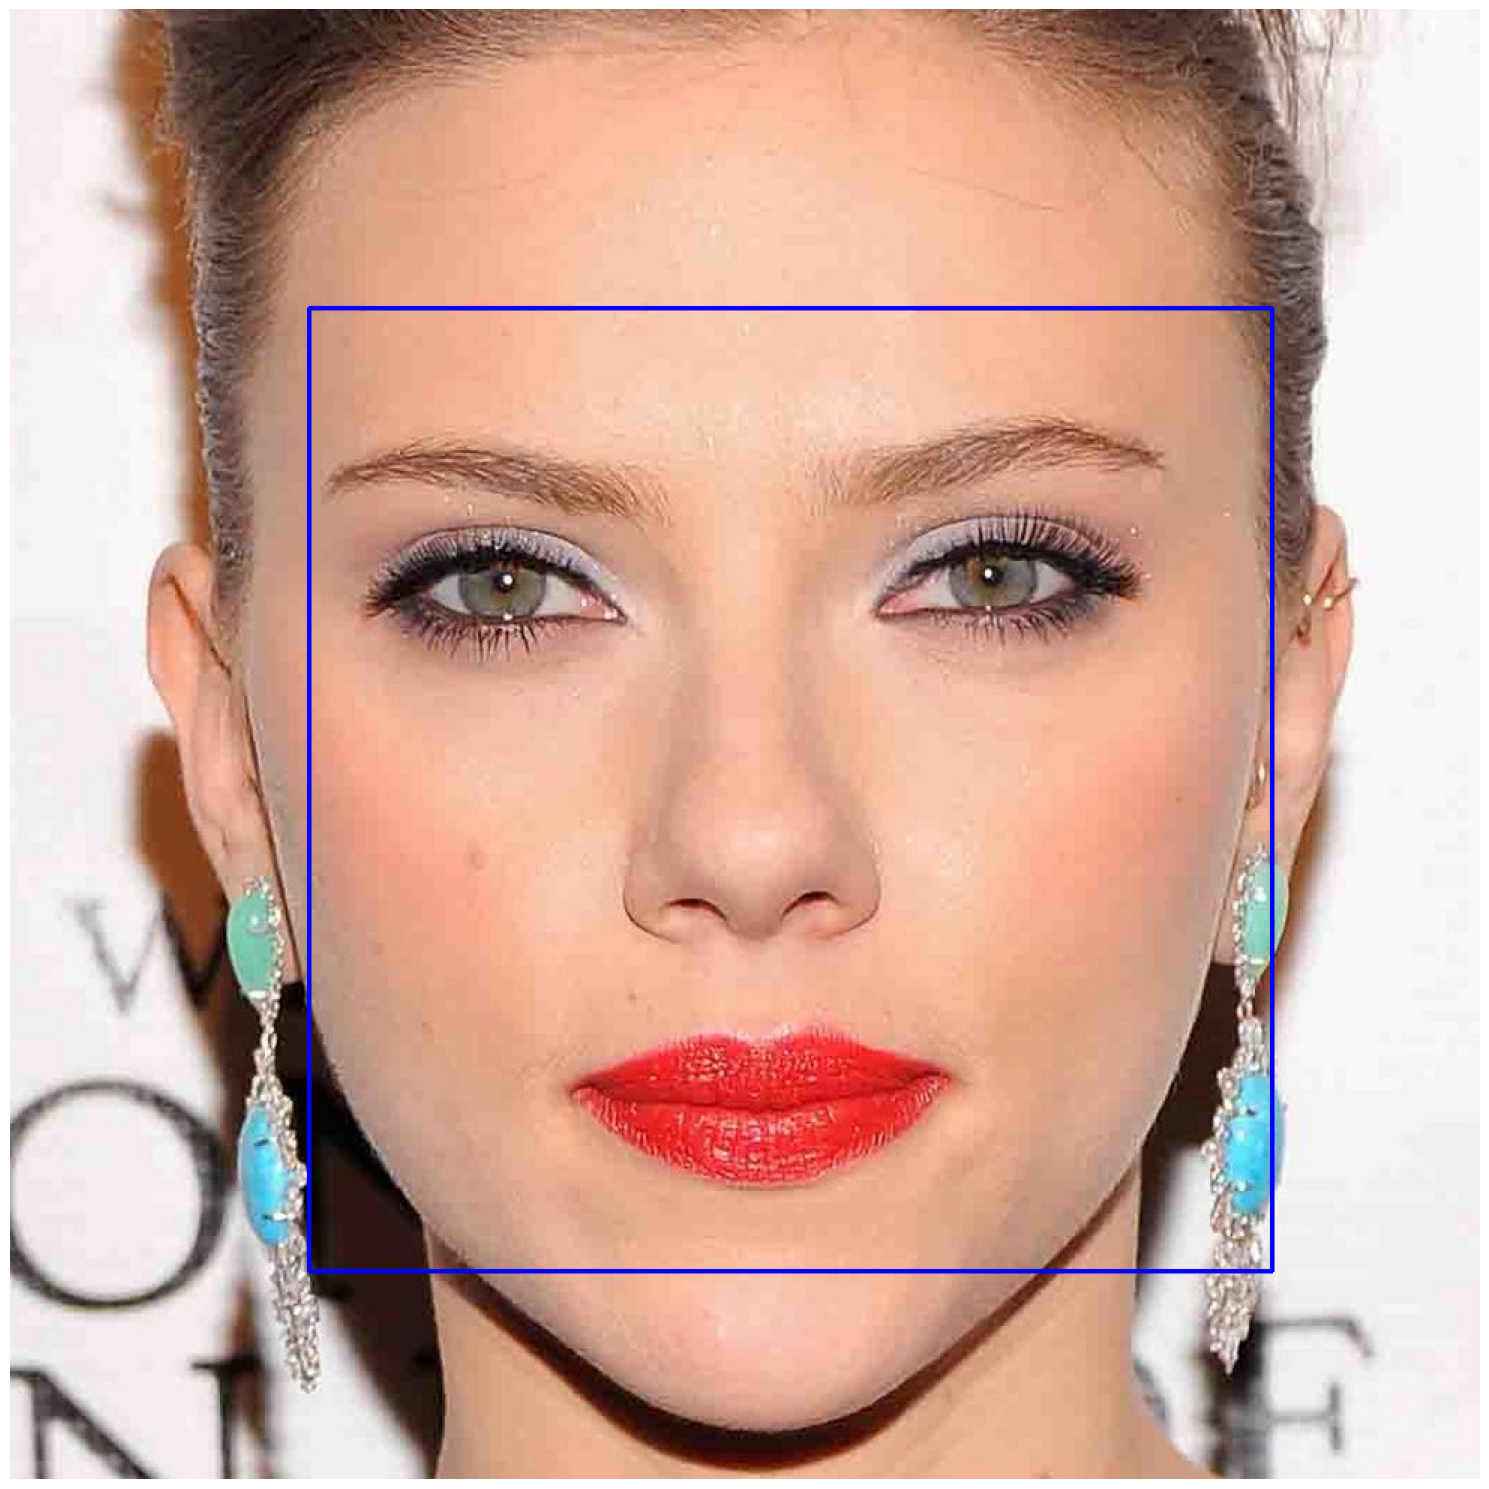

In [3]:
#Import potrebnih biblioteka koje omogućavaju:
#rad s OpenCV za obradu slika
import cv2
#korišćenje HOG detektora lica
import dlib
#prikazivanje slika
import matplotlib.pylab as plt

#Učitavanje i konverzija fotografije u RGB format slike
img = cv2.cvtColor(cv2.imread('cropped_images/scarlett_johansson/scarlett_johansson2.png'), cv2.COLOR_BGR2RGB)
#Inicijalizacija hog detektora lica
hog_detector = dlib.get_frontal_face_detector()
#Detekcija lica
faces = hog_detector(img, 0)

#Broj detektovanih lica
print(len(faces))

#Prolazak kroz lice i crtanje pravougaonika oko njega
for face in faces:
    left,top,right,bottom = face.left(), face.top(), face.right(), face.bottom()
    img = cv2.rectangle(img,(left,top),(right,bottom),(0,0,255),2)

#Prikaz rezultata fotografije
plt.figure(figsize=(15,20))
plt.imshow(img), plt.axis('off')
plt.tight_layout()
plt.show()

## **Prepoznavanje lica**

Sistem za prepoznavanje lica ima zadatak da pronalazi osobe u bazi podataka poznatih lica kako bi predvideo koja osoba se nalazi na slici. U slučaju da osoba nije prisutna u bazi podataka, možemo odlučiti da osobu dodamo ili je jednostavno označimo kao nepoznatu.

Inspirisani sposobnostima ljudskog vida, istraživači u oblasti Računarske Vizije su razvijali različite karakteristike lica kako bi detaljnije opisali svaku osobu. Ključno je pronaći odgovarajući set ovih karakteristika za reprezentaciju lica. Sa razvojem Dubokog Učenja, računari postaju sve bolji u automatskom izboru relevantnih karakteristika, koristeći Konvolucione Neuronske Mreže (CNN). Cilj je identifikovati optimalan skup karakteristika koji precizno opisuje svako lice i omogućava pouzdano razlikovanje između različitih osoba.
Ova tehnologija se koristi za autentifikaciju korisnika, ali može i doprineti bezbednosti i suzbijanju nezakonitih aktivnosti, iako može narušiti privatnost. Sistemi za prepoznavanje lica razlikuju se po svojoj sposobnosti da identifikuju ljude u teškim uslovima. Ovi sistemi obično prolaze kroz fazu detekcije lica, analize lica, konverzije slike u podatke i traženja podudaranja kako bi identifikovali osobu.

Instalacija potrebne biblioteke za vrsenje prepoznavanja lica.

In [4]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=cf3502a0fd77b515a67f6909cb60eaa2304ee878cbb3c31c389781cb99b20207
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


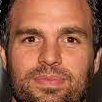

In [5]:
#Učitavanje i prikazivanje slike koristeći Python biblioteke PIL (Python Imaging Library) i IPython
from PIL import Image, ImageDraw
from IPython.display import display

pil_im = Image.open('cropped_images/mark_ruffalo/mark_ruffalo7.png')
display(pil_im)

In [6]:
#Importovanje potrebnih biblioteka za prepoznavanje lica i manipulaciju slikama
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

#Primer prepoznavanja više lica na jednoj slici i iscrtavanje pravougaonika oko svake identifikovane osobe (lica)

#Učitavanje slike
scarlett_image = face_recognition.load_image_file('cropped_images/scarlett_johansson/scarlett_johansson45.png')
#Izdvajanje face encoding koji se koristi za identifikaciju osobe na drugim slikama
scarlett_face_encoding = face_recognition.face_encodings(scarlett_image) [0]

chris_image = face_recognition.load_image_file('cropped_images/chris_evans/chris_evans18.png')
chris_face_encoding = face_recognition.face_encodings(chris_image) [0]

robert_image = face_recognition.load_image_file('cropped_images/robert_downey_jr/robert_downey_jr44.png')
robert_face_encoding = face_recognition.face_encodings(robert_image) [0]

chrish_image = face_recognition.load_image_file('cropped_images/chris_hemsworth/chris_hemsworth22.png')
chrish_face_encoding = face_recognition.face_encodings(chrish_image) [0]

#Pravljenje niza poznatih lica i učenje njihovih imena
known_face_encodings = [
    scarlett_face_encoding,
    chris_face_encoding,
    robert_face_encoding,
    chrish_face_encoding
]
known_face_names = [
    "Scarlett Johansson",
    "Chris Evans",
    "Robert Downey",
    "Chris Hemsworth"
]

#Ispis koliko je lica poznato
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 4 images.


In [7]:
#Kreiranje foldera i ubacivanje slike sa više lica
!mkdir known
!wget https://collider.com/wp-content/uploads/the-avengers-cast-slice.jpg -O known/avengers.jpg

--2023-09-11 13:38:08--  https://collider.com/wp-content/uploads/the-avengers-cast-slice.jpg
Resolving collider.com (collider.com)... 3.223.39.19
Connecting to collider.com (collider.com)|3.223.39.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23182 (23K) [image/jpeg]
Saving to: ‘known/avengers.jpg’

known/avengers.jpg  100%[===================>]  22.64K  --.-KB/s    in 0s      

2023-09-11 13:38:08 (257 MB/s) - ‘known/avengers.jpg’ saved [23182/23182]



<ipython-input-8-7b8e05131c0d>:33: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-8-7b8e05131c0d>:33: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-8-7b8e05131c0d>:33: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-8-7b8e05131c0d>:33: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-8-7b8e05131c0d>:33: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  t

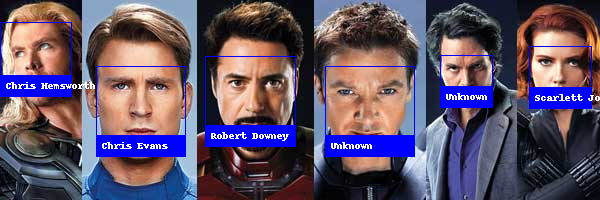

In [8]:
#Učitavanje slike sa više lica
unknown_image = face_recognition.load_image_file('known/avengers.jpg')

#Pronalaženje svih lica na slici
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

#Slika se konvertuje u PIL-format što omogućava dodavanje grafike i teksta na sliku.
pil_image = Image.fromarray(unknown_image)

#Pravljenje instance za uspešno crtanje
draw = ImageDraw.Draw(pil_image)

#Iteracija kroz svako detektovano lice na slici
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    #Provera da li se lice podudara sa poznatim licem
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    #Utvrđujemo koliko se lice na slici razlikuje od svakog poznatog lica.
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    #Pronalazimo indeks najmanje udaljenosti u nizu
    best_match_index = np.argmin(face_distances)
    #Proveravamo da li se lice na slici podudara sa poznatim licem sa najmanjom udaljenošću.
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    #Iscrtavanje pravougaonika oko detektovanog lica
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    #Ispisiivanje imena ispod detektovanog lica
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


#Uklanjanje biblioteke crteža iz memorije
del draw

#Prikazivanje rezultata slike
display(pil_image)

## **OpenCV**

OpenCV (*Open Source Computer Vision Library*) je otvorena biblioteka za računarsku viziju i mašinsko učenje. Ova biblioteka je razvijena kako bi pružila zajedničku infrastrukturu za aplikacije računarske vizije i ubrzala upotrebu mašinskog učenja u komercijalnim proizvodima. Kao proizvod sa Apache 2 licencom, OpenCV omogućava kompanijama lako korišćenje i modifikovanje koda.

Biblioteka sadrži više od 2500 optimizovanih algoritama, uključujući sveobuhvatan skup kako klasičnih tako i najsavremenijih algoritama za računarsku viziju i mašinsko učenje. Ovi algoritmi se mogu koristiti za detekciju i prepoznavanje lica, identifikaciju objekata, klasifikaciju ljudskih akcija u video snimcima, praćenje kretanja kamere, praćenje pokretnih objekata, izdvajanje 3D modela objekata, generisanje 3D oblaka tačaka iz stereo kamera, pronalaženje sličnih slika u bazi slika, uklanjanje crvenih očiju sa slika snimljenih bljeskom, praćenje pokreta očiju, prepoznavanje pejzaža i postavljanje markera za nadogradnju sa proširenom stvarnošću, itd.

OpenCV ima više od 47 hiljada članova korisničke zajednice i procenjen broj preuzimanja prelazi 18 miliona. Biblioteka se široko koristi u kompanijama, istraživačkim grupama i od strane vladinih tela.

OpenCV podržava C++, Python, Java i MATLAB interfejse i podržava Windows, Linux, Android i Mac OS operativne sisteme. OpenCV je usmeren pretežno ka primenama u realnom vremenu.


## **HaarCascade**

Haar Cascades je algoritam za detekciju objekata koji je postao ključan u oblasti računarske vizije, posebno za prepoznavanje lica. Razvijen od strane Paul Viola i Michael Jones 2001. godine, ovaj algoritam koristi posebne osobine poznate kao "Haar osobine" kako bi analizirao slike i identifikovao obrasce koji odgovaraju traženim objektima, kao što su lica.

Ono što Haar Cascades čini posebnim je njegova kaskadna struktura klasifikatora. Umesto da analizira svaki piksel na slici, algoritam koristi niz klasifikatora organizovanih u kaskadu. Svaki klasifikator je sve precizniji u prepoznavanju potencijalnih objekata. Ako određeni deo slike ne pređe prag odlučivanja određenog klasifikatora, taj deo se brzo odbacuje kao da ne sadrži objekat, što omogućava brzu i efikasnu detekciju.

Haar Cascades se široko koristi u raznim primenama, uključujući prepoznavanje lica u kamerama pametnih telefona, sigurnosnim sistemima, detekciji tablica sa registarskim brojevima i mnogim drugim oblastima računarske vizije. Njegova sposobnost za realno vreme i resursnu efikasnost čini ga ključnim alatom u modernoj računarskoj viziji.


Ovaj kod koristi OpenCV biblioteku za detekciju lica, očiju i osmeha na digitalnoj slici. Počinje uvozom potrebnih biblioteka, uključujući OpenCV, i učitavanjem prethodno obučenih klasifikatora za ove karakteristike. Zatim se odabrana slika konvertuje u crno-belu boju radi bolje obrade.

Nakon toga, primenjuje se detekcija lica na slici pomoću `face_cascade.detectMultiScale` funkcije, koja označava pronađena lica crvenim pravougaonicima. Za svako prepoznato lice, algoritam koristi `eye_cascade.detectMultiScale` za pronalaženje očiju i `smile_cascade.detectMultiScale` za pronalaženje osmeha, a zatim označava oči zelenim i osmeh plavim pravougaonicima.
Na kraju, rezultat se prikazuje korisniku sa vizuelnim indikacijama prepoznatih lica, očiju i osmeha na slici.

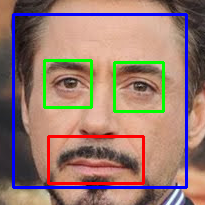

-1

In [12]:
#Importovanje potrebne biblioteke
import cv2
from google.colab.patches import cv2_imshow

#Učitavanje klasifikatora lica, oka i osmeha
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_eye.xml'))
smile_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_smile.xml'))

#Učitavanje fotografije
img = cv2.imread('cropped_images/robert_downey_jr/robert_downey_jr41.png')

#Konvertovanje fotografije u sivu boju
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Detektovanje lica
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

#Prolazak kroz sva lica i crtanje pravougaonika
for (x, y, w, h) in faces:
    #Crtanje pravougaonika
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    #Detektovanje očiju i crtanje pravougaonika oko levog i desnog oka
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.04, 10)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    #Detektovanje osmeha i crtanje pravougaonika oko njega
    smile = smile_cascade.detectMultiScale(roi_gray, 1.38, 6)
    for (mx,my,mw,mh) in smile:
        cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,0,255),2)

#Prikaz rezultata fotografije
cv2_imshow(img)
cv2.waitKey()

## **MediaPipe**

MediaPipe je biblioteka razvijena u junu 2019. godine, namenjena izgradnji sistema za obradu percepcijskih podataka kao što su slike, video snimci i audio podaci. Jedna od ključnih funkcionalnosti MediaPipe-a je njegovo veoma brzo rešenje za detekciju lica, koje se zasniva na algoritmu poznatom kao BlazeFace. BlazeFace koristi lagani model za izdvajanje karakteristika inspirisan MobileNet modelom i efikasnu šemu za rad sa grafičkom procesorskom jedinicom (GPU). Rezultat BlazeFace detekcije su informacije o pozicijama i karakterističnim tačkama lica, što omogućava precizno prepoznavanje i praćenje lica na slikama i video snimcima.

U daljem kodu inicijalizuje se MediaPipe model za detekciju lica i alati za crtanje kako bi se olakšalo obeležavanje detektovanih lica i karakterističnih tačaka na slici.

Sledeći korak je određivanje promenljive IMAGE_FILES koja sadrži putanje do slika koje će se analizirati. Zatim se prolazi kroz svaku sliku, učitava se i pretvara u RGB format kako bi se mogla obraditi pomoću MediaPipe algoritma za detekciju lica.

Sama detekcija lica se vrši u petljama. Ako se ne detektuje nijedno lice na slici, prelazi se na sledeću sliku. U suprotnom, na originalnoj slici se crtaju pravougaonici oko svakog detektovanog lica i iscrtavaju se karakteristične tačke na licu.

Instaliranje potrebne biblioteke

In [38]:
!pip install mediapipe

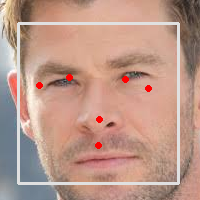

-1

In [39]:
#Importovanje potrebnih biblioteka
import cv2
import mediapipe as mp

#Inicijalizacija MediaPipe modela za detekciju
mp_face_detection = mp.solutions.face_detection
#Korišćeni su MediaPipe alati za crtanje da bi se lakše nacrtao pravougaonik i tačke na licu
mp_drawing = mp.solutions.drawing_utils

#Dodeljivanje promenljive za sliku koja će se učitati
IMAGE_FILES = ['cropped_images/chris_hemsworth/chris_hemsworth26.png']
#Učitavanje modela detekcije lica gde se podešava model selection i prag pouzdanosti rezultata detekcije koji se podešava prema ulaznoj slici
with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:

  #Prolazak kroz slike ako ih ima više, u ovom slučaju samo jedna, i njeno učitavanje
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    #Pretvara se slika u RGB i obrađuje se pomoću MediaPipe detekcije lica
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    #Crtanje svake detekcije na slici
    if not results.detections:
      continue
    annotated_image = image.copy()
    #Iterira se preko svake detekcija i icrtava se na slici
    for detection in results.detections:
      print('Nose tip:')
      print(mp_face_detection.get_key_point(
          detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
      mp_drawing.draw_detection(annotated_image, detection)
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

#Prikaz rezultata fotografije
cv2_imshow(annotated_image)
cv2.waitKey()

## **MTCNN**
MTCNN (MultiTask Cascaded Convolutional Neural Network) predstavlja moderno sredstvo za detekciju lica koje koristi detekciju putem neuronske mreže u tri faze. Prvi korak uključuje višestruku promenu veličine slika kako bi se identifikovala lica različitih dimenzija. Nakon toga, P-mreža (Proposal) analizira slike i obavlja prvu detekciju sa niskim pragom, što može dovesti do mnogo lažno pozitivnižh rezultata, ali je to deo namernog procesa. Predloženi regioni, uključujući i lažne pozitivne rezultate, postaju ulaz za drugu mrežu, R-mrežu (Refine), koja koristi tehniku nemaksimalne supresije (NMS) za filtriranje detekcija i postizanje preciznijih graničnih okvira. U završnoj fazi, O-mreža (Output) vrši konačno optimizovanje graničnih okvira. Ovo omogućava ne samo detekciju lica već i precizne i ispravne granične okvire. Opciona karakteristika MTCNN-a je otkrivanje karakterističnih tačaka na licu, kao što su oči, nos i uglovi usta.
MTCNN je efikasan i praktičan alat koji može da se koristi besplatno za detekciju lica i pruža visok nivo preciznosti i otpornost na različite faktore kao što su veličina lica, osvetljenje i rotacija. Iako je nešto sporiji od Viola-Jones detektora, može efikasno raditi uz pomoć GPU-a i uzima u obzir informacije o boji slika, jer koristi RGB slike kao ulaz.

Instaliranje potrebne biblioteke

In [40]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.7 MB/s eta 0:00:00


U ovom kodu prvo se importuju potrebne biblioteke, uključujući MTCNN (MultiTask Cascaded Convolutional Neural Network) detektor, OpenCV (cv2) za rad sa slikama i cv2_imshow za prikazivanje rezultata u Colab okruženju. Zatim se učitava slika koja će biti obrađena. Nakon toga, inicijalizuje se MTCNN detektor i koristi se za otkrivanje lica na slici. Rezultat detekcije su koordinate okvira lica, koordinate levog oka, desnog oka, nosa, leve ivice usta i desne ivice usta za svako otkriveno lice na slici. Sve te informacije su prikazane kao rezultat za dalju obradu ili prikazivanje.

In [41]:
#Importovanje potrebnih biblioteka
from mtcnn.mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

#Učitavanje fotografije za obradu
image = cv2.imread('cropped_images/scarlett_johansson/scarlett_johansson6.png')

#Učitavanje detektora i detektovanje lica
detector = MTCNN()
faces = detector.detect_faces(image)

#Za izlaz se dobijaju koordinate okvira lica, levog oka, desnog oka, nosa, leve ivice usta i desne ivice usta
for face in faces:
  print(face)

1/1 [==============================] - 0s 312ms/step
{'box': [40, 2, 343, 435], 'confidence': 0.9999532699584961, 'keypoints': {'left_eye': (152, 158), 'right_eye': (305, 196), 'nose': (215, 263), 'mouth_left': (119, 305), 'mouth_right': (263, 340)}}


Kod u nastavku definiše funkciju `create_box` koja ima za cilj da na ulaznoj slici detektuje lice, označi ga pravougaonikom i označi ključne tačke na licu, kao što su levo i desno oko, nos, levu i desnu ivicu usta. Prvo, koristi se MTCNN detektor da bi se detektovalo lice na slici, a zatim se dobijaju koordinate okvira lica i ključnih tačaka. Nakon toga, funkcija crta pravougaonik oko lica na slici koristeći ove koordinate i označava ključne tačke na licu crtanjem tačaka na odgovarajućim mestima. Na kraju, funkcija vraća sliku sa označenim licem i ključnim tačkama. Rezultirajuća slika se prikazuje korišćenjem `cv2_imshow`.

1/1 [==============================] - 0s 20ms/step


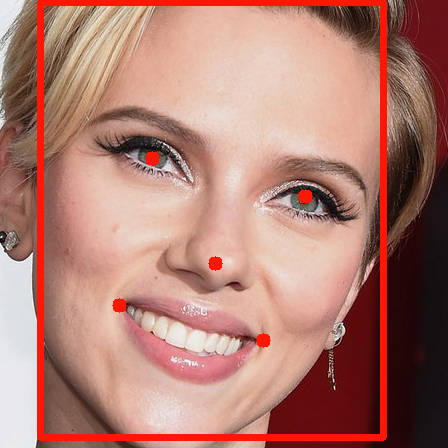

In [42]:
#Kreiranje okvira koji ce na slici biti prikazan kao pravougaonik
def create_box(image):
  #Detektovanje lica na slici
  faces = detector.detect_faces(image)
  bounding_box = faces[0]['box']
  keypoints = faces[0]['keypoints']

  #Crtanje pravougaonika (cv2.rectangle(fotografija, start_point, end_point, boja, debljina))
  cv2.rectangle(image,
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                (5, 22, 255),
                5)

  #Kreiranje tacki koje ce oznacavati levo i desno oko, nos i levu i desnu ivicu usta
  cv2.circle(image,(keypoints['left_eye']), 2, (5, 22, 255), 10)
  cv2.circle(image,(keypoints['right_eye']), 2, (5, 22, 255), 10)
  cv2.circle(image,(keypoints['nose']), 2, (5, 22, 255), 10)
  cv2.circle(image,(keypoints['mouth_left']), 2, (5, 22, 255), 10)
  cv2.circle(image,(keypoints['mouth_right']), 2, (5, 22, 255), 10)

  return image

#Hvatanje slike iz fukcije za ivičenje i njen prikaz
marked_image = create_box(image)
cv2_imshow(marked_image)

1/1 [==============================] - 0s 109ms/step


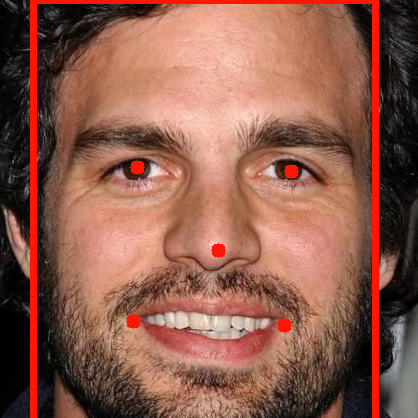

In [43]:
#Prikaz još jedne slike
marked_image = create_box(cv2.imread('cropped_images/mark_ruffalo/mark_ruffalo27.png'))
cv2_imshow(marked_image)

1/1 [==============================] - 0s 102ms/step


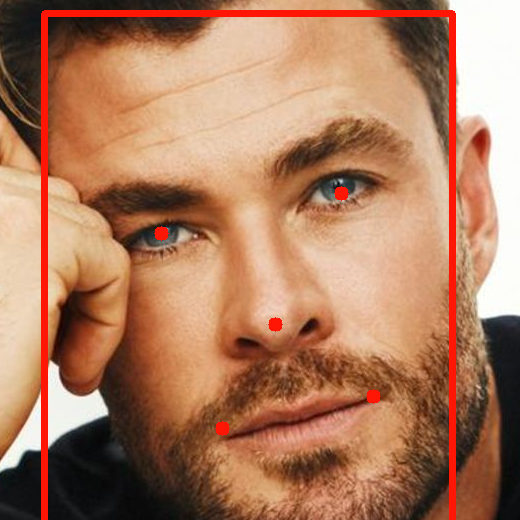

In [45]:
marked_image = create_box(cv2.imread('cropped_images/chris_hemsworth/chris_hemsworth22.png'))
cv2_imshow(marked_image)

## **Zaključak**
Izrada ovog rada odnosno, detekcija lica primenom različitih tehnika mašinskog i dubokog učenja predstavljala je pravi izazov. Kroz analizu i primenu algoritama kao što su HOG karakteristike, HaarCascade, MediaPipe i MTCNN biblioteke, uspešno je izvršena detekcija lica poznatih glumaca iz filma Avengers, uključujući Scarlet Johansson, Chris Evans, Chris Hemsworth, Mark Ruffalo i Robert Downey Jr. Svaka od navedenih metoda ima svoje karakteristike i prednosti, čime pruža različite pristupe rešavanju problema detekcije lica. Važno je istaći da izbor odgovarajuće metode zavisi od specifičnih zahteva i okolnosti aplikacije u kojoj se primenjuje. Sama detekcija lica igra ključnu ulogu u mnogim aplikacijama, uključujući prepoznavanje lica, video nadzor, bezbednost i druge oblasti. Kroz ovo istraživanje, stekla sam dublje razumevanje ovih tehnika i njihov potencijal za primenu u širokom spektru oblasti.

## **Literatura**

[1]https://learnopencv.com/what-is-face-detection-the-ultimate-guide/#Face-Detection-vs-Face-Recognition

[2]http://elibrary.matf.bg.ac.rs/bitstream/handle/123456789/3902/masterMarkoStankovic.pdf?sequence=1

[3]https://www.techtarget.com/searchenterpriseai/definition/face-detection

[4]https://learnopencv.com/face-recognition-an-introduction-for-beginners/

[5]https://www.fer.unizg.hr/_download/repository/[DeMSI]_Standardne_metode_za_detekciju_osoba_u_staticnim_slikama_i_video_sekvencama.pdf

[6]https://opencv.org/about/
